<a href="https://colab.research.google.com/github/in3xes/CAP5610/blob/master/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1:**

In [203]:
import pandas as pd
import numpy as np

test = pd.read_csv('/content/test_football.csv')
train = pd.read_csv('/content/train_football.csv')

combined = [train, test]

train.head()

,ID,Date,Opponent,Is_Home_or_Away,Is_Opponent_in_AP25_Preseason,Media,Label
0,1,9/5/2015,Texas,Home,Out,1-NBC,Win
1,2,9/12/2015,Virginia,Away,Out,4-ABC,Win
2,3,9/19/2015,GeorgiaTech,Home,In,1-NBC,Win
3,4,9/26/2015,UMass,Home,Out,1-NBC,Win
4,5,10/3/2015,Clemson,Away,In,4-ABC,Lose


In [204]:
# cleaning

train = train.drop(["ID"], axis = 1)
train = train.drop(["Date"], axis = 1)

cols = ["Opponent", "Is_Home_or_Away", "Is_Opponent_in_AP25_Preseason", "Media", "Label"]

for col in cols:
  train[col] = train[col].astype('category').cat.codes

train.head()

,Opponent,Is_Home_or_Away,Is_Opponent_in_AP25_Preseason,Media,Label
0,14,1,1,0,1
1,17,0,1,3,1
2,4,1,0,0,1
3,15,1,1,0,1
4,2,0,0,3,0


In [205]:
test = test.drop(["ID"], axis = 1)
test = test.drop(["Date"], axis = 1)

cols = ["Opponent", "Is_Home_or_Away", "Is_Opponent_in_AP25_Preseason", "Media", "Label"]

for col in cols:
  test[col] = test[col].astype('category').cat.codes

test.head()

,Opponent,Is_Home_or_Away,Is_Opponent_in_AP25_Preseason,Media,Label
0,9,1,1,0,1
1,1,1,0,0,0
2,0,0,1,1,1
3,4,0,1,2,1
4,3,1,1,0,1


In [206]:
from sklearn.model_selection import train_test_split

train_labels = train['Label']
train_data = train.drop('Label', axis=1)

test_labels = test['Label']
test_data = test.drop('Label', axis=1)


print(train_data.shape, test_data.shape, train_labels.shape, test_labels.shape)

(24, 4) (12, 4) (24,) (12,)


In [207]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score



classifier = GaussianNB()
classifier.fit(train_data, train_labels)

pred = classifier.predict(test_data)

# print(pred)
# print(test_labels)

accuracy = accuracy_score(test_labels, pred)
f1 = f1_score(test_labels, pred)
precision = precision_score(test_labels, pred)
recall = recall_score(test_labels, pred)

from tabulate import tabulate
print(tabulate([['accuracy', accuracy],  ['precision', precision],  ['recall', recall], ['f1', f1]], headers=['Metric', 'Value']))

Metric        Value
---------  --------
accuracy   0.833333
precision  1
recall     0.777778
f1         0.875


In [208]:
for p in pred:
  if p == 1:
    print("Win")
  else:
    print("Lose")

Win
Lose
Win
Win
Win
Lose
Lose
Win
Win
Lose
Win
Lose


**KNN**

In [209]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

pred = knn.predict(test_data)

# print(pred)
# print(test_labels)

accuracy = accuracy_score(test_labels, pred)
f1 = f1_score(test_labels, pred)
precision = precision_score(test_labels, pred)
recall = recall_score(test_labels, pred)

from tabulate import tabulate
print(tabulate([['accuracy', accuracy],  ['precision', precision],  ['recall', recall], ['f1', f1]], headers=['Metric', 'Value']))

Metric        Value
---------  --------
accuracy   0.583333
precision  0.75
recall     0.666667
f1         0.705882


In [210]:
for p in pred:
  if p == 1:
    print("Win")
  else:
    print("Lose")

Lose
Win
Win
Lose
Win
Lose
Win
Win
Win
Win
Win
Lose


**Task 2:**

In [211]:
import pandas as pd
import numpy as np

test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

combined = [train, test]

#preprocessing:

#From homework 1 & 2

from numpy.random import uniform

# Fill null in Fare to median
for df in combined:
  median_fare = df['Fare'].median()
  df['Fare'] = df['Fare'].fillna(median_fare)

for t in combined:
  train_fare = t["Fare"].tolist()

  for x in range(0, len(train_fare)):
    if t.at[t.index[x], 'Fare'] > -0.001 and t.at[t.index[x], 'Fare'] <= 7.91:
      t.at[t.index[x], 'Fare'] =  0
    elif t.at[t.index[x], 'Fare'] > 7.91 and t.at[t.index[x], 'Fare'] <= 14.454:
      t.at[t.index[x], 'Fare'] =  1
    elif t.at[t.index[x], 'Fare'] > 14.454 and t.at[t.index[x], 'Fare'] <= 31.0:
      t.at[t.index[x], 'Fare'] =  2
    elif t.at[t.index[x], 'Fare'] > 31.0 and t.at[t.index[x], 'Fare'] <= 512.329:
      t.at[t.index[x], 'Fare'] =  3  

# Fill null in embarked and make them numerical
embarked_to_num_map = {'S': 0, 'C': 1, 'Q': 2}
for df in combined:
  df['Embarked'] = df['Embarked'].fillna('S')
  df['Embarked'] = df['Embarked'].map(embarked_to_num_map)


# Change sex to numerical
sex_to_num_map = {'female': 1, 'male': 0}
for df in combined:
  df['Sex'] = df['Sex'].map(sex_to_num_map).astype(int)

# Adgust null in Age based on median and std
for df in combined:
  std_age = df['Age'].std()
  median_age = df['Age'].median() 
  df['Age'] = df['Age'].fillna(uniform(std_age, median_age))
  df.loc[ df['Age'] <= 15, 'Age'] = 0
  df.loc[(df['Age'] > 15) & (df['Age'] <= 30), 'Age'] = 1
  df.loc[(df['Age'] > 30) & (df['Age'] <= 45), 'Age'] = 2
  df.loc[(df['Age'] > 45) & (df['Age'] <= 60), 'Age'] = 3
  df.loc[ df['Age'] > 60, 'Age'] = 4  




# feature selection

drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

train.head()


,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,0,1.0,0,0.0,0
1,1,1,1,2.0,0,3.0,1
2,1,3,1,1.0,0,1.0,0
3,1,1,1,2.0,0,3.0,0
4,0,3,0,2.0,0,1.0,0


In [212]:
from sklearn.model_selection import train_test_split

label = train["Survived"]
train_d = train.drop("Survived", axis=1)
train_data,test_data,train_labels,test_labels=train_test_split(train_d, label, test_size=0.3, random_state=42)

print(train_data.shape, test_data.shape, train_labels.shape, test_labels.shape)


(623, 6) (268, 6) (623,) (268,)


**Naïve Bayes**

In [220]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = ['accuracy', 'precision', 'recall', 'f1']

classifier = GaussianNB()
classifier.fit(train_data, train_labels)


# cross_validate(classifier, train_d, label, cv=5)

results = cross_validate(estimator=classifier,
                                          X=train_d,
                                          y=label,
                                          cv=5,
                                          scoring=scoring)

df = pd.DataFrame(results)

df


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.004893,0.004964,0.670391,1.000000,0.144928,0.253165
1,0.002365,0.003433,0.741573,0.923077,0.352941,0.510638
2,0.002131,0.003325,0.702247,0.941176,0.235294,0.376471
3,0.002170,0.003285,0.707865,0.863636,0.279412,0.422222
4,0.002173,0.003316,0.724719,1.000000,0.289855,0.449438


**KNN**

In [222]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier()
k_range = list(range(1,11))
weights_options = ['uniform','distance']
k_grid = dict(n_neighbors=k_range, weights = weights_options)
grid = GridSearchCV(knn, k_grid, cv=10, scoring = 'precision')
grid.fit(train_data, train_labels)

# for i in ['mean_test_score', 'std_test_score', 'param_n_neighbors']:
#   print(i," : ",grid.cv_results_[i][::2])

results = cross_validate(estimator=knn,
                                          X=train_d,
                                          y=label,
                                          cv=5,
                                          scoring=scoring)

df = pd.DataFrame(results)

df

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.002490,0.009751,0.703911,0.595238,0.724638,0.653595
1,0.002741,0.010631,0.780899,0.710145,0.720588,0.715328
2,0.002799,0.009920,0.825843,0.793651,0.735294,0.763359
3,0.002704,0.009706,0.808989,0.814815,0.647059,0.721311
4,0.002591,0.009351,0.837079,0.844828,0.710145,0.771654


In [223]:
l = ["K", "Mean test score", "Std test score"]
pd.DataFrame([grid.cv_results_['param_n_neighbors'][::2], grid.cv_results_['mean_test_score'][::2], grid.cv_results_['std_test_score'][::2]], l)

,0,1,2,3,4,5,6,7,8,9
K,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
Mean test score,0.724021,0.854594,0.825551,0.857579,0.792550,0.841773,0.787392,0.830054,0.807920,0.833689
Std test score,0.124112,0.089278,0.096805,0.103485,0.095576,0.071988,0.093430,0.094987,0.085838,0.083411


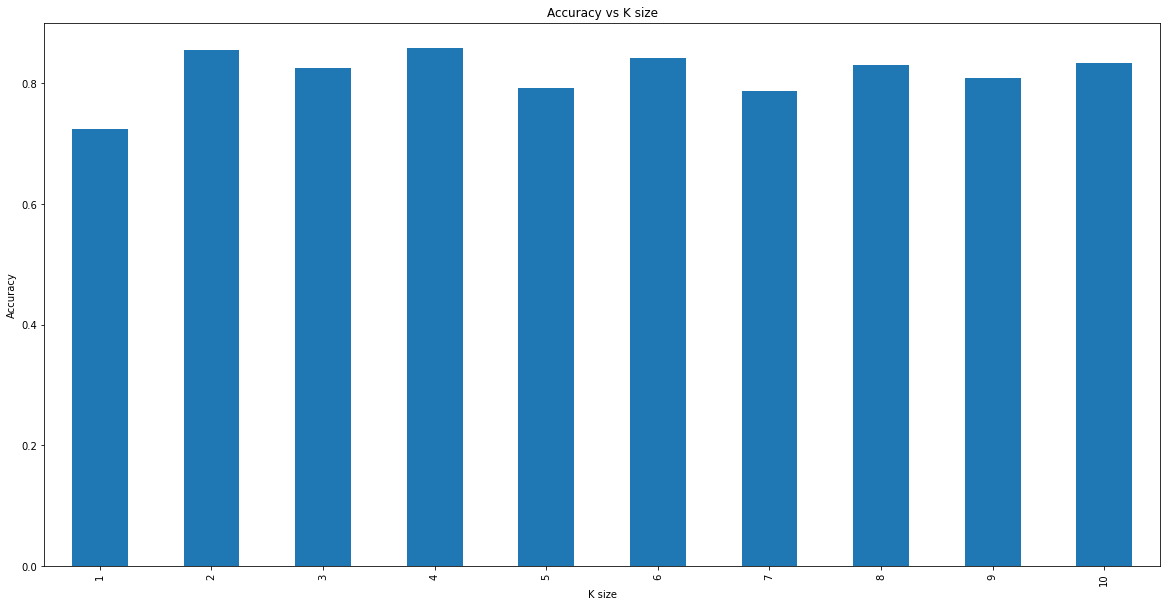

In [224]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

s = pd.Series(grid.cv_results_['mean_test_score'][::2], grid.cv_results_['param_n_neighbors'][::2])

s.plot.bar(figsize=(20,10))
plt.xlabel('K size')
plt.ylabel('Accuracy')
plt.title("Accuracy vs K size"); 

In [197]:
label_pred = grid.predict(test)

result=clf.predict(test)
testset = pd.read_csv('/content/test.csv')
index=[testset['PassengerId']]
df=pd.DataFrame(data=label_pred,index=testset['PassengerId'],columns=['Survived'])
df.to_csv('gender_submission.csv',header=True)
print('gender_submission.csv')

gender_submission.csv
